<a href="https://colab.research.google.com/github/DAIVSONAZE/VideoGameVendas/blob/master/VideoGameSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [ ]:
#Video Game Sales
#Analyze sales data from more than 16,500 games.
#SetData: https://www.kaggle.com/gregorut/videogamesales

In [2]:

ledados = pd.read_csv('vgsales.csv')

In [ ]:
ledados.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
#Numero de NaN
ledados.isnull().sum().sum()

329

In [8]:
#Colunas que possuem o NaN
ledados.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
ledados = ledados.replace({"Year": {np.nan: 0}})#Muda de NaN para 0
ledados = ledados.replace({"Publisher": {np.nan: "Não definido"}}) #Muda de NaN para "Não definido"


In [15]:
ledados.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
ledados

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
ledados.shape()

(16598, 11)

In [ ]:
type(ledados)

pandas.core.frame.DataFrame

In [ ]:
ledados.describe

<bound method NDFrame.describe of         Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]>

In [ ]:
ledados.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
#Informções do Dataset
print(" Dataset Information: " + str(ledados.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
 Dataset Information: None


In [ ]:
ledados.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [ ]:
ledados.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
ledados['Year']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [ ]:
ledados.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01


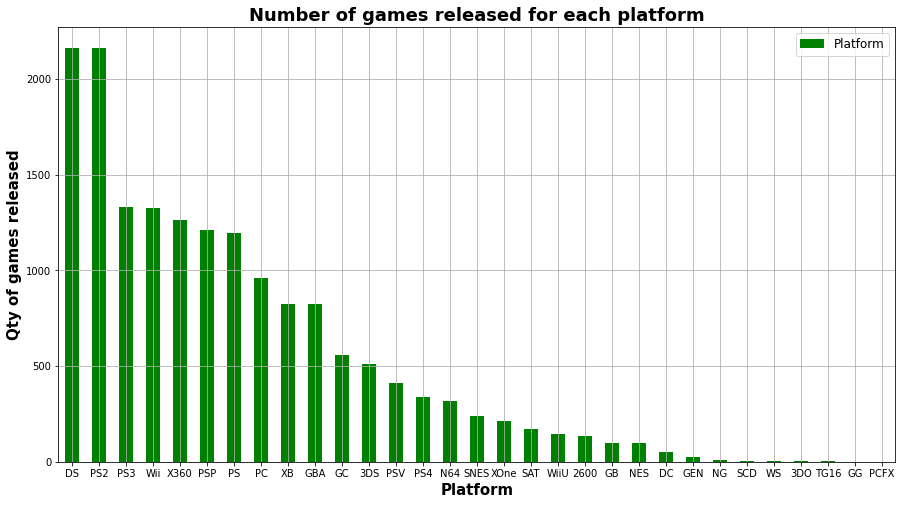

In [ ]:
# Numero de jogos lancados para cada plataforma
ledados['Platform'].value_counts().plot(kind = 'bar', figsize = (15,8), grid = True, rot = 0, color = 'green')
plt.title('Number of games released for each platform', fontweight='bold', size=18)
plt.xlabel('Platform',fontweight='bold', size=15) #nomeando o eixo X, negrito e font 15
plt.ylabel('Qty of games released',fontweight='bold', size=15) #nomeando o eixo y, negrito e font 15
plt.legend(loc='upper right', prop={'size':12}) # legenda no interior do grafico(direita superior)
plt.show() #independe de colocar ou nao. Evita de aparecer isso: "Text(0, 0.5, 'Qty of games released')"

In [ ]:
## Numero de jogos lancados para cada ano
ledados['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
ledados['Platform'].unique()

array(['2600', 'NES', 'DS', 'PC', 'GB', 'GEN', 'SNES', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', 'PSV', '3DS', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [ ]:
ledados['Name'].unique()

array(['Checkers', 'Boxing', 'Freeway', ..., 'Shorts',
       'Agarest Senki: Re-appearance', 'Hakuouki: Shinsengumi Kitan'],
      dtype=object)

In [ ]:
ledados['Genre'].unique()

array(['Misc', 'Fighting', 'Action', 'Shooter', 'Sports', 'Puzzle',
       'Platform', 'Simulation', 'Racing', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [ ]:
ledados['Publisher'].unique()

array(['Atari', 'Activision', 'Imagic', '20th Century Fox Video Games',
       'Mattel Interactive', 'Data Age', 'Parker Bros.', 'Coleco',
       'Starpath Corp.', 'Men-A-Vision', 'Taito', 'Unknown',
       'Tigervision', 'Mystique', 'Avalon Interactive', 'Sega', 'Bomb',
       'CPG Products', 'CBS Electronics', 'ITT Family Games',
       'Answer Software', 'Quelle', 'Universal Gamex',
       'Wizard Video Games', 'Nintendo', 'Namco Bandai Games',
       'Hudson Soft', 'Capcom', 'Mycom', 'Konami Digital Entertainment',
       'SquareSoft', 'Enix Corporation', 'Maxis', 'Palcom',
       'HAL Laboratory', 'Culture Brain', 'Epoch', 'Square', 'BPS',
       'Human Entertainment', 'Tecmo Koei', 'Banpresto', 'Imagineer',
       'Kemco', 'Angel Studios', 'Ocean', 'Virgin Interactive',
       'Arena Entertainment', 'New World Computing', 'id Software',
       'ChunSoft', 'Takara', 'Video System', 'Electronic Arts', 'Laguna',
       'Coconuts Japan', 'Interplay', 'Imax', 'SNK', 'Victor Interactiv

In [ ]:
plt.rcParams['figure.figsize'] = (11, 7)

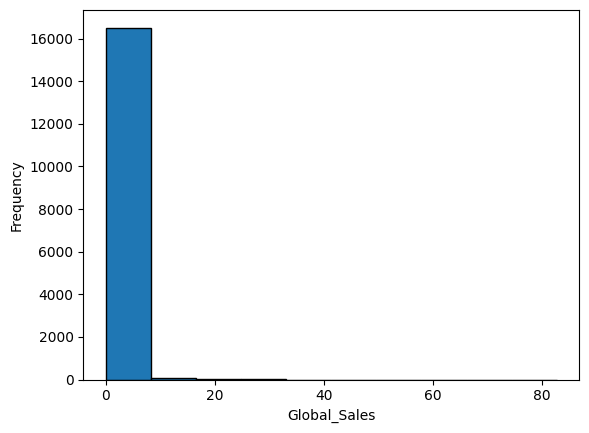

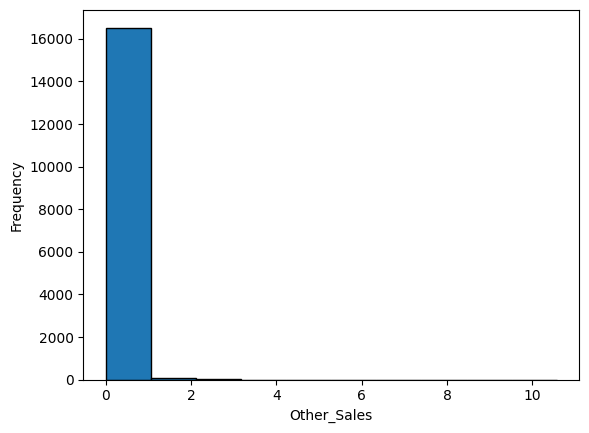

In [ ]:
ledados['Global_Sales' ].plot.hist(bins=10, edgecolor='black')
plt.xlabel("Global_Sales")
plt.show()

ledados['Other_Sales' ].plot.hist(bins=10, edgecolor='black')
plt.xlabel("Other_Sales")
plt.show()



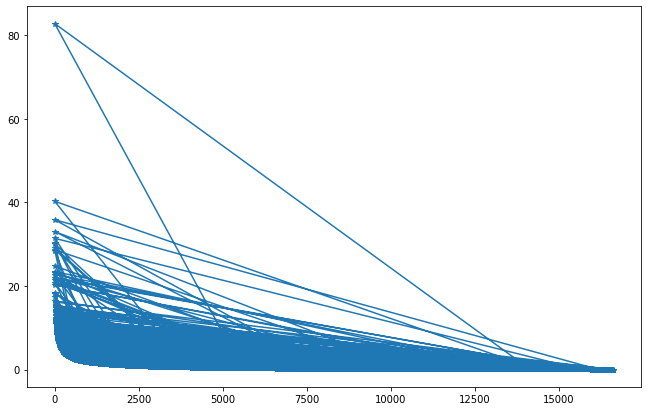

In [ ]:
plt.plot( ledados.Global_Sales, '*-')
plt.show()

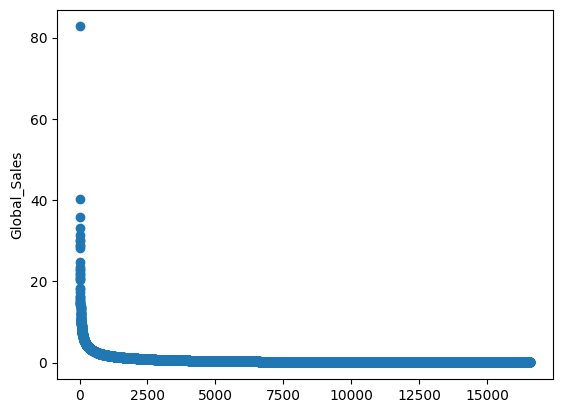

In [ ]:
plt.scatter(ledados.Rank, ledados.Global_Sales)
plt.ylabel("Global_Sales")
plt.show()

In [ ]:
ledados.query('Global_Sales > 80')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


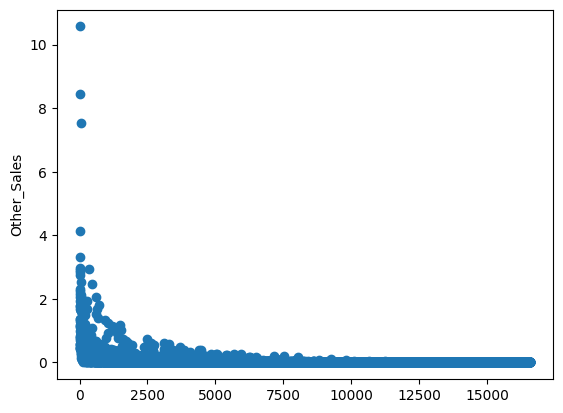

In [ ]:
plt.scatter(ledados.Rank, ledados.Other_Sales)
plt.ylabel("Other_Sales")
plt.show()

In [ ]:
#ledados_vendas = ledados.query('EU_Sales > JP_Sales') #sem sucesso depois da query ->.sort_values('EU_Sales', ascending=False)
#ledados_vendas.loc[1:10 ,['Name','EU_Sales', 'JP_Sales']].sort_values('EU_Sales', ascending=False)

In [ ]:
#ledados_vendas

In [ ]:
#criando um novo dataframe para a tabela logo em seguida
ledados2 = pd.DataFrame({ "Rank": ledados.Rank.values,
                         "Platform": ledados.Platform.values,
                          "Name_Game": ledados.Name.values,
                         "Global_Sales": ledados.Global_Sales.values,
                         "Year": ledados.Year.values
                         
                          })

In [ ]:
ledados2

,Rank,Platform,Name_Game,Global_Sales,Year
0,1,Wii,Wii Sports,82.74,2006.0
1,2,NES,Super Mario Bros.,40.24,1985.0
2,3,Wii,Mario Kart Wii,35.82,2008.0
3,4,Wii,Wii Sports Resort,33.00,2009.0
4,5,GB,Pokemon Red/Pokemon Blue,31.37,1996.0
...,...,...,...,...,...
16593,16596,GBA,Woody Woodpecker in Crazy Castle 5,0.01,2002.0
16594,16597,GC,Men in Black II: Alien Escape,0.01,2003.0
16595,16598,PS2,SCORE International Baja 1000: The Official Game,0.01,2008.0
16596,16599,DS,Know How 2,0.01,2010.0


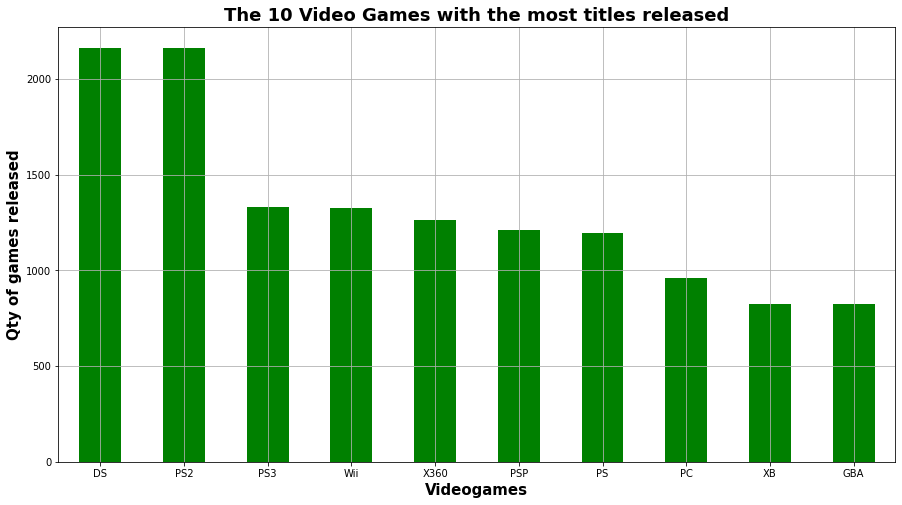

In [ ]:
#Criando um gráfico utilizando apenas uma linha de código 
ledados2['Platform'].value_counts().head(10).plot(kind = 'bar', figsize = (15,8), grid = True, rot = 0, color = 'green')
#chamei a variável que acessa o dataset, acessei o top 10 por plata forma e criei um grafico usando a funcao plot com seus atributos

#Enfeitando o gráfico. Abaixo, definimos um título
plt.title('The 10 Video Games with the most titles released', fontweight='bold', size=18)
plt.xlabel('Videogames',fontweight='bold', size=15) #nomeando o eixo X
plt.ylabel('Qty of games released',fontweight='bold', size=15) #nomeando o eixo y
plt.show() #independe de colocar ou nao. Evita de aparecer isso: "Text(0, 0.5, 'Qty of games released')"

In [ ]:
#mostrar os dados do dataframe no intervalo de 1 ate 100
ledado3 = ledados.loc[1 : 100 , ['Year', 'Name', 'NA_Sales' ,	'EU_Sales' ,	'JP_Sales' ,	'Other_Sales' ,	'Global_Sales']]

In [ ]:
ledado3

,Year,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1985.0,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,2008.0,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
3,2009.0,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
4,1996.0,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
5,1989.0,Tetris,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...
96,1988.0,Super Mario Bros. 2,5.39,1.18,0.70,0.19,7.46
97,2014.0,Super Smash Bros. for Wii U and 3DS,3.24,1.35,2.42,0.43,7.45
98,2008.0,Call of Duty: World at War,4.79,1.90,0.00,0.69,7.37
99,2011.0,Battlefield 3,4.46,2.13,0.06,0.69,7.34


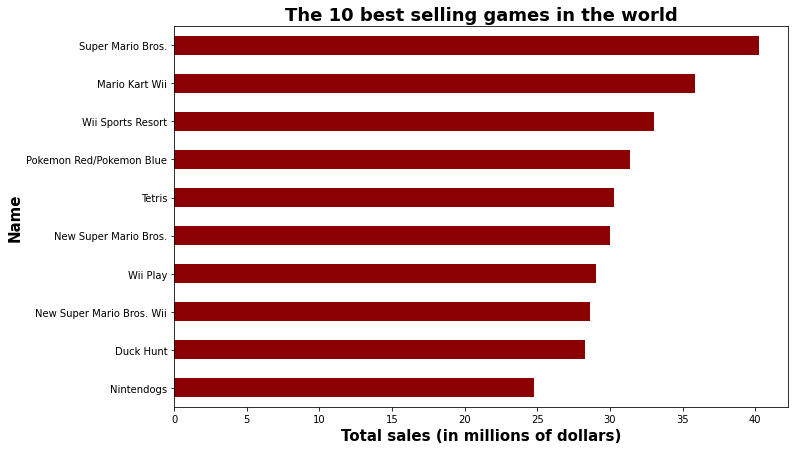

In [ ]:
#O dataframe( revebendo Nome e venda global) com os 10 jogos mais vendidos 
vendidos_10 = ledado3[['Name','Global_Sales']].head(10).set_index('Name').sort_values('Global_Sales', ascending=True)
vendidos_10.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)


plt.title('The 10 best selling games in the world', fontweight='bold', size=18)
plt.xlabel('Total sales (in millions of dollars)', fontweight='bold', size=15)
plt.ylabel('Name', fontweight='bold', size=15)
plt.show()

In [ ]:
ledado3.groupby(by='Name')['Global_Sales'].mean()
#A media das vendas globais por nome de game

Name
Animal Crossing: New Leaf                        9.09
Animal Crossing: Wild World                     12.27
Battlefield 3                                    7.34
Brain Age 2: More Training in Minutes a Day     15.30
Brain Age: Train Your Brain in Minutes a Day    20.22
                                                ...  
Wii Fit                                         22.72
Wii Fit Plus                                    22.00
Wii Party                                        8.49
Wii Play                                        29.02
Wii Sports Resort                               33.00
Name: Global_Sales, Length: 91, dtype: float64

In [ ]:
ledado3.groupby(by=['Year', 'Name'])['Global_Sales'].mean()

Year    Name                                     
1982.0  Pac-Man                                       7.81
1984.0  Duck Hunt                                    28.31
1985.0  Super Mario Bros.                            40.24
1988.0  Super Mario Bros. 2                           7.46
        Super Mario Bros. 3                          17.28
                                                     ...  
2014.0  Pokemon Omega Ruby/Pokemon Alpha Sapphire    11.33
        Super Smash Bros. for Wii U and 3DS           7.45
2015.0  Call of Duty: Black Ops 3                    14.24
        FIFA 16                                       8.49
        Star Wars Battlefront (2015)                  7.67
Name: Global_Sales, Length: 93, dtype: float64